# Clinician Effectiveness Checker

Dr. Arriaga suggested this interesting notion of checking how a clinician is performing based on their patients' BDI, PSS, and other factors. Another factor to consider would be the audio features captured during the clincian's speech, for which I am currently doing the audio cleanup.

As an initial exercise, this notebook simply explores the various clinicians (mentioned as Assessor in the excel sheet), and how the patients associated with them perofrmed in terms of Depression and Post-Traumatic symptoms. Using such metrics in conjuction to audio features could be an interesting avenue to explore in the future!

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
clinical_info_file_path = "clinical_info.xlsx"
df = pd.read_excel(clinical_info_file_path, engine="openpyxl")

In [50]:
clinician_names = ["JLM", "TMC", "JSS", "JAW", "VJM", "EDS", "TSB", "HMG", "AOR", "LMP", "KGB", "LCZ", "JRM", "DRF"]

In [51]:
def didImproveBDI(patient_id):
    df_patient = df.loc[df['SID'] == patient_id]
    df_BDI = df_patient[['BDItotalscore_ED', 'BDItotalscore_1mo', 'BDItotalscore_3mo', 'BDItotalscore_6mo', 'BDItotalscore_12mo']]
    df_BDI = df_BDI.values.tolist()[0]
    
    index = 0
    while df_BDI[index]==None:
        index = index+1
    first_score = df_BDI[index]
    
    index = len(df_BDI)-1
    while df_BDI[index]==None:
        index = index-1
    last_score = df_BDI[index]
    if(last_score<first_score):
        return True
    return False

def didImprovePSS(patient_id):
    df_patient = df.loc[df['SID'] == patient_id]
    df_PSS = df_patient[['PSStotal_1month', 'PSStotal_3month', 'PSStotal_6month', 'PSStotal_12month']]
    df_PSS = df_PSS.values.tolist()[0]
    
    index = 0
    while df_PSS[index]==None:
        index = index+1
    first_score = df_PSS[index]
    
    index = len(df_PSS)-1
    while df_PSS[index]==None:
        index = index-1
    last_score = df_PSS[index]
    if(last_score<first_score):
        return True
    return False

def isCorrectClassification(patient_id):
    df_patient = df.loc[df['SID'] == patient_id]
    df_patient_score = df_patient[['ed_patient_rated_severity_sti42']]
    patient_rated_severity = df_patient_score.values.tolist()[0][0]
    df_clinician_score = df_patient[['ed_clinician_rated_severity_sti43']]
    clinician_rated_severity = df_clinician_score.values.tolist()[0][0]
    if(clinician_rated_severity==patient_rated_severity):
        return True
    return False

In [52]:
def clinicianCureStats(clinician_name):
    df_patients_with_clinician = df.loc[(df['Assessor']==clinician_name)]
    df_patients = df_patients_with_clinician['SID']
    patients_list = df_patients.values.tolist()
    
    treatment = [0, 0]
    classification = [0, 0]
    labels = 'Reduced Depression', 'Increased Depression'
    for patient in patients_list:
        if(didImproveBDI(patient)):
            treatment[0] = treatment[0] + 1
        else:
            treatment[1] = treatment[1] + 1
        '''
        if(isCorrectClassification(patient)):
            classification[0] = classification[0] + 1
        else:
            classification[1] = classification[1] + 1
        '''
    fig1, ax1 = plt.subplots()
    ax1.pie(treatment, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Depression Recovery score for Clinician "+clinician_name)
    plt.show()    

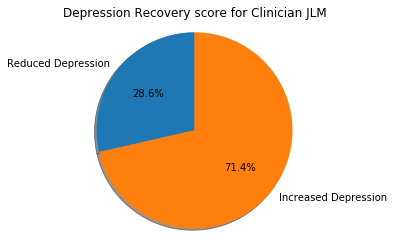

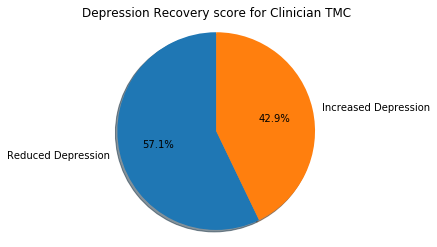

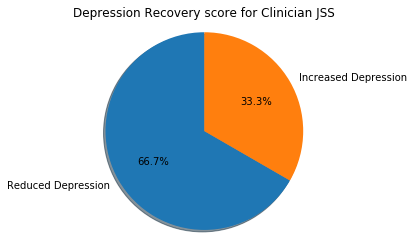

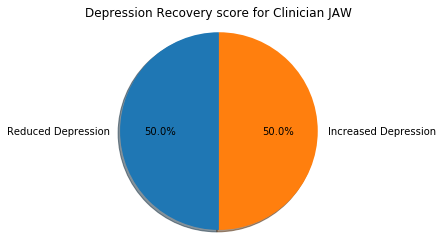

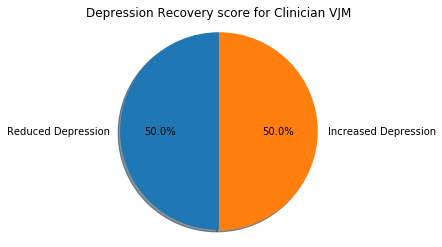

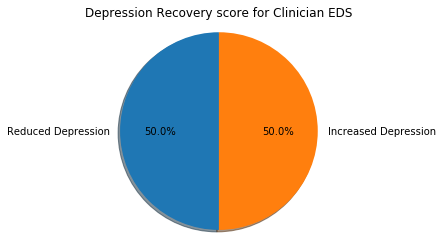

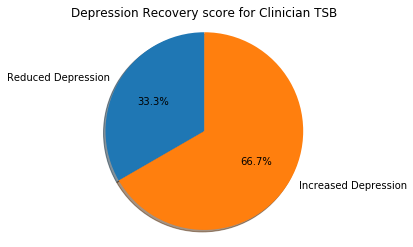

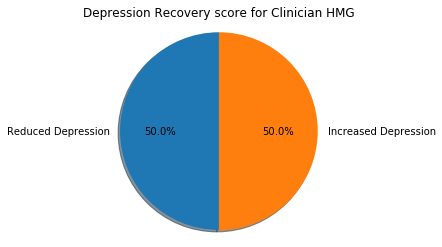

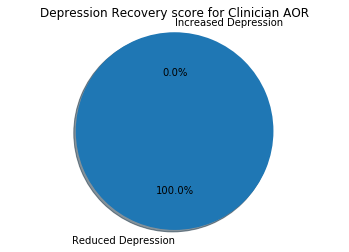

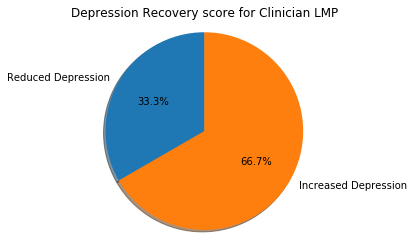

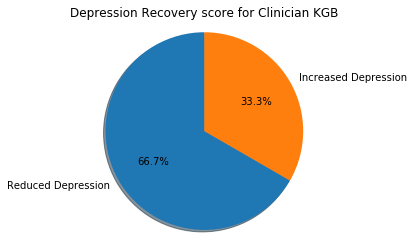

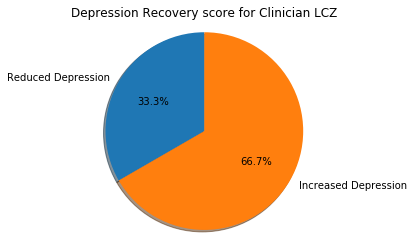

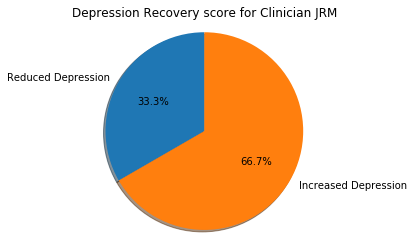

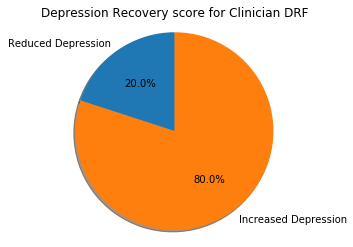

In [53]:
for clinician in clinician_names:
    clinicianCureStats(clinician)

## Observations, thoughts, and questions

1. Even if the results did show some trend, couldn't someone argue saying that the clinicians with poorer performance perhaps had the hardest patients to deal with? Could the performances be merely random based on this attribute?
2. While listening to the followup sessions, I realized that in some cases, the assessor isn't the same for all follow up sessions of the same patient.
3. However, this code could be helpful in analyzing scenarios wherein each patient has a designated clinician throughout their treatment.
4. Good News! Got a reply from the OIT regarding the Microsoft Word Transcription Service, stating "Yes, that is being loaded/saved to your personal OneDrive directory that is within the GT Tenant". Currently it gives only 300 minutes of free transcribing, so ask Dr. Arriaga if more would be needed? Also, we could utilize free 300 minutes via multiple GT students from the lab?